# Insight Coding Demo - DeepMoon
By: Ari Silburt

In [1]:
import numpy as np
import pandas as pd
import h5py
import matplotlib.pyplot as plt
from keras.models import load_model
from PIL import Image
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

import utils.processing as proc
import utils.template_match_target as tmt
import utils.transform as tfm

Using TensorFlow backend.


## Data

In [2]:
# Load sample of Data
test_imgs = h5py.File('Insight_sample.hdf5', 'r')
Data = {'test': [test_imgs['input_images'][...].astype('float32'),
                 test_imgs['target_masks'][...].astype('float32')]}

# pre-process - normalize image pixels to 1
proc.preprocess(Data)

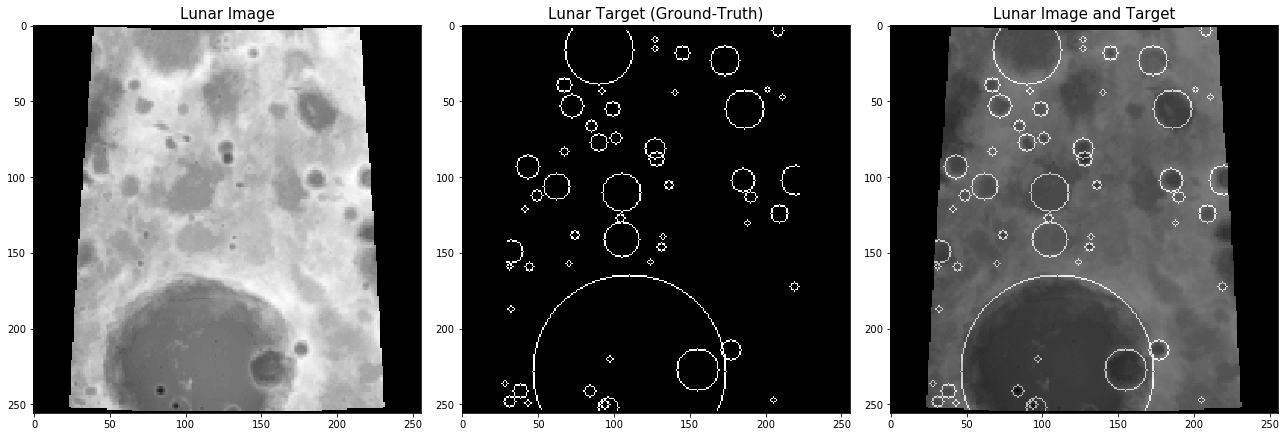

In [3]:
# image number
i=0

# plot 
img = Data['test'][0][i].reshape(256, 256)
target = Data['test'][1][i]

f, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=[18, 6])
ax1.imshow(img, origin='upper', cmap='Greys_r')
ax2.imshow(target, origin='upper', cmap='Greys_r')
ax3.imshow(img, origin='upper', cmap='Greys_r')
ax3.imshow(target, origin='upper', cmap='Greys_r', alpha=0.5)
ax1.set_title("Lunar Image", fontsize=15)
ax2.set_title("Lunar Target (Ground-Truth)", fontsize=15)
ax3.set_title("Lunar Image and Target", fontsize=15)
plt.tight_layout()

## Generating Predictions From Trained Model Weights

In [4]:
model = load_model('model_keras1.2.2.h5')

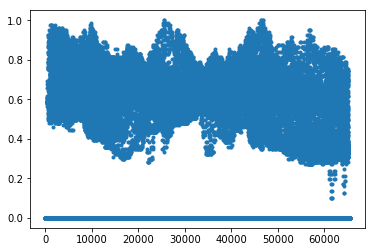

In [8]:
plt.plot(Data['test'][0][i].flatten(), '.')

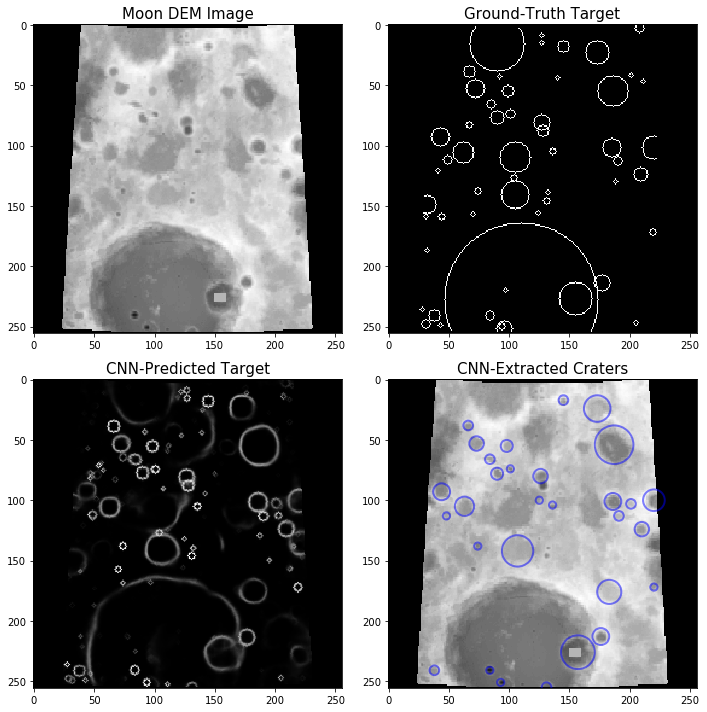

In [30]:
# image number
i=0
img = Data['test'][0][i, np.newaxis].copy()

# set pixels to 1 in range
x = [150,160]
y = [223,230]
#img[:,y[0]:y[1],x[0]:x[1],:] = 1

# Use the CNN to make a prediction
pred = model.predict(img)
# Use scikit-image template matching to extract crater locations.  Only search for craters with r >= 3 pixels.
extracted_rings = tmt.template_match_t(pred[0].copy(), minrad=3.)

# plot
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=[10, 10])
#img = Data['test'][0][i].reshape(256, 256)
target = Data['test'][1][i]
ax1.imshow(img.reshape(256, 256), origin='upper', cmap='Greys_r')
ax2.imshow(target, origin='upper', cmap='Greys_r')
ax3.imshow(pred[0], origin='upper', cmap='Greys_r')
ax4.imshow(img.reshape(256, 256), origin='upper', cmap="Greys_r")
for x, y, r in extracted_rings:
    circle = plt.Circle((x, y), r, color='blue', fill=False, linewidth=2, alpha=0.5)
    ax4.add_artist(circle)
ax1.set_title('Moon DEM Image', fontsize=15)
ax2.set_title('Ground-Truth Target', fontsize=15)
ax3.set_title('CNN-Predicted Target', fontsize=15)
ax4.set_title('CNN-Extracted Craters', fontsize=15)
plt.tight_layout()
#plt.savefig("images/Corr1_perturb_black.png")